<a href="https://colab.research.google.com/github/hamzabinashraf/CodeAlpha_Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 Iris Flower Classification – ML Project**

**📌 Objective:**
Train a machine learning model to classify Iris flower species (Setosa, Versicolor, Virginica) based on their measurements.

**✅ Step 1: Import requried Libraries**

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**📥 Step 2: Load the Iris Dataset**

In [2]:
# Load the Iris dataset from sklearn
iris = load_iris()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

# Display first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**📊 Step 3: Exploratory Data Analysis (EDA)**

**A):-  Basic Data Exploration**

In [6]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names
print("Column names:", df.columns.tolist())

# Information about dataset: data types, nulls
df.info()

Shape of dataset: (150, 5)
Column names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Data Exploration**
The output provides some basic information about the Iris dataset:

- **Shape of dataset:** `(150, 5)` indicates that the dataset has 150 rows (observations) and 5 columns (features).
- **Column names:** `['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']` lists the names of the columns in the dataset. These represent the measurements of sepal and petal dimensions, and the species of the iris flower.
- **Dataset Information (`iris.info()`):** This provides a summary of the DataFrame, including:
    - The index range (150 entries from 0 to 149).
    - A list of columns, their non-null counts, and data types. All columns have 150 non-null values, indicating no missing data.
    - The data types are `float64` for the numerical measurements (sepal length, sepal width, petal length, petal width) and `object` for the `species` column (which contains strings).
    - Memory usage of the DataFrame.

In [8]:
# Descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The output of `iris.describe()` provides descriptive statistics for the numerical columns in the dataset (`sepal_length`, `sepal_width`, `petal_length`, and `petal_width`).

For each of these columns, the following statistics are shown:

- **count:** The number of non-null observations. For all columns, this is 150, confirming there are no missing values.
- **mean:** The average value.
- **std:** The standard deviation, a measure of the spread or dispersion of the data.
- **min:** The minimum value.
- **25%:** The first quartile (25th percentile).
- **50%:** The median (50th percentile).
- **75%:** The third quartile (75th percentile).
- **max:** The maximum value.

These statistics give us a quick overview of the central tendency, variability, and distribution of the sepal and petal measurements. For example, we can see the range of values for each measurement and how they are distributed around the mean.

**B):-Scatter Plot – Relationship Between Features**

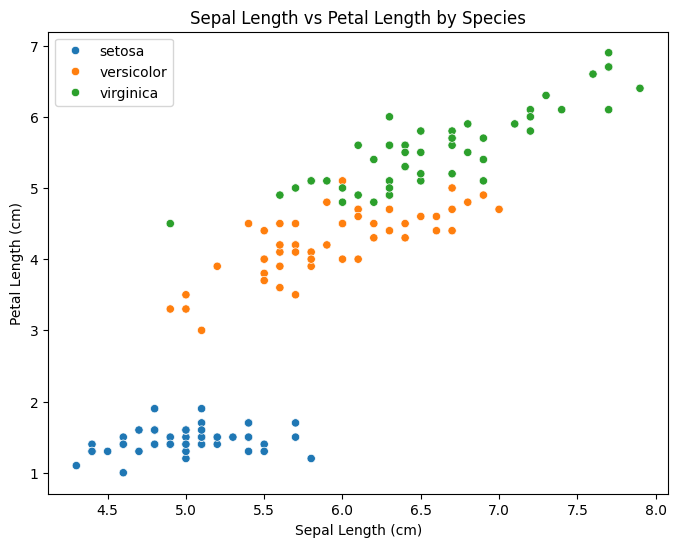

In [12]:
# Scatter plot between sepal_length and petal_length colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

The scatter plot visualizes the relationship between `sepal_length` and `petal_length` for each of the three Iris species.

- **X-axis:** Represents the sepal length of the iris flowers.
- **Y-axis:** Represents the petal length of the iris flowers.
- **Color:** Each point is colored according to the species it belongs to (`setosa`, `versicolor`, or `virginica`).

**Observations from the plot:**

- **Setosa (Blue points):** These flowers tend to have shorter sepal lengths and significantly shorter petal lengths compared to the other two species. They form a distinct, well-separated cluster in the bottom-left corner of the plot. This suggests that petal length is a strong distinguishing feature for Setosa.
- **Versicolor (Orange points):** These flowers fall in the middle range for both sepal length and petal length. They overlap somewhat with Virginica but are generally separable from Setosa.
- **Virginica (Green points):** These flowers tend to have longer sepal lengths and longer petal lengths. They form a cluster in the upper-right corner of the plot, with some overlap with Versicolor.

This plot clearly shows that `petal_length` is a very effective feature for distinguishing between the species, particularly separating Setosa from Versicolor and Virginica. `sepal_length` also contributes to the separation, but `petal_length` appears to be a more dominant factor in this particular visualization.

**C):- Histograms – Distribution of Each Feature**

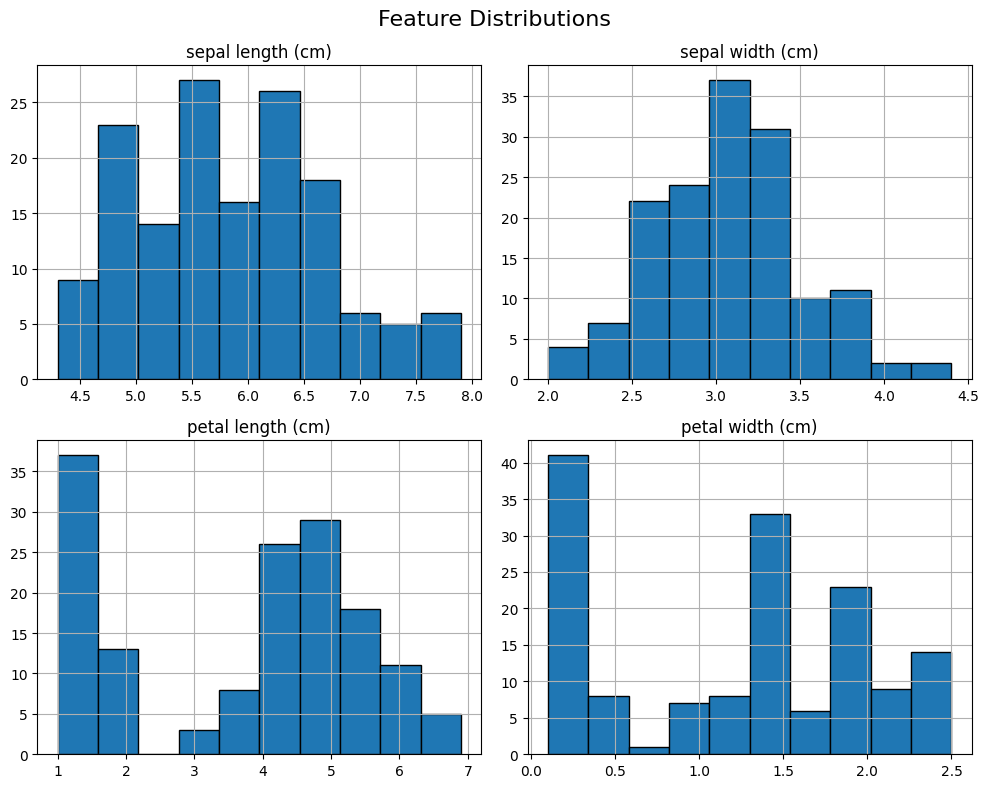

In [16]:
# Plot histograms for all numerical features
df.hist(edgecolor='black', figsize=(10, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


The histograms display the distribution of each numerical feature in the Iris dataset: `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`.

Each histogram shows:
- **X-axis:** The range of values for the specific feature.
- **Y-axis:** The frequency or count of observations falling within each bin (range of values).

**Observations from the histograms:**

- **sepal_length:** The distribution appears roughly normal (bell-shaped), with a peak around 5.8 cm. There is a spread of values from around 4.3 cm to 7.9 cm.
- **sepal_width:** This distribution is also somewhat normal, but with a slight skew to the right (a longer tail on the right side). The peak is around 3.0 cm, with values ranging from 2.0 cm to 4.4 cm.
- **petal_length:** This distribution is clearly bimodal (having two peaks). The first peak is around 1.5 cm, and the second is around 4.5 cm. This bimodal nature suggests that the different species have significantly different petal lengths, which aligns with the observation from the scatter plot. Setosa likely contributes to the first peak, while Versicolor and Virginica contribute to the second, broader peak.
- **petal_width:** Similar to petal length, this distribution is also bimodal, with a strong peak near 0.2 cm and another broader peak around 1.3 cm. This further supports the idea that petal width is a good feature for distinguishing species.

Overall, the histograms provide insight into the range and frequency of values for each measurement. The bimodal distributions of petal length and petal width highlight their importance in differentiating between the Iris species.

** D):- Box Plots – Detecting Outliers**

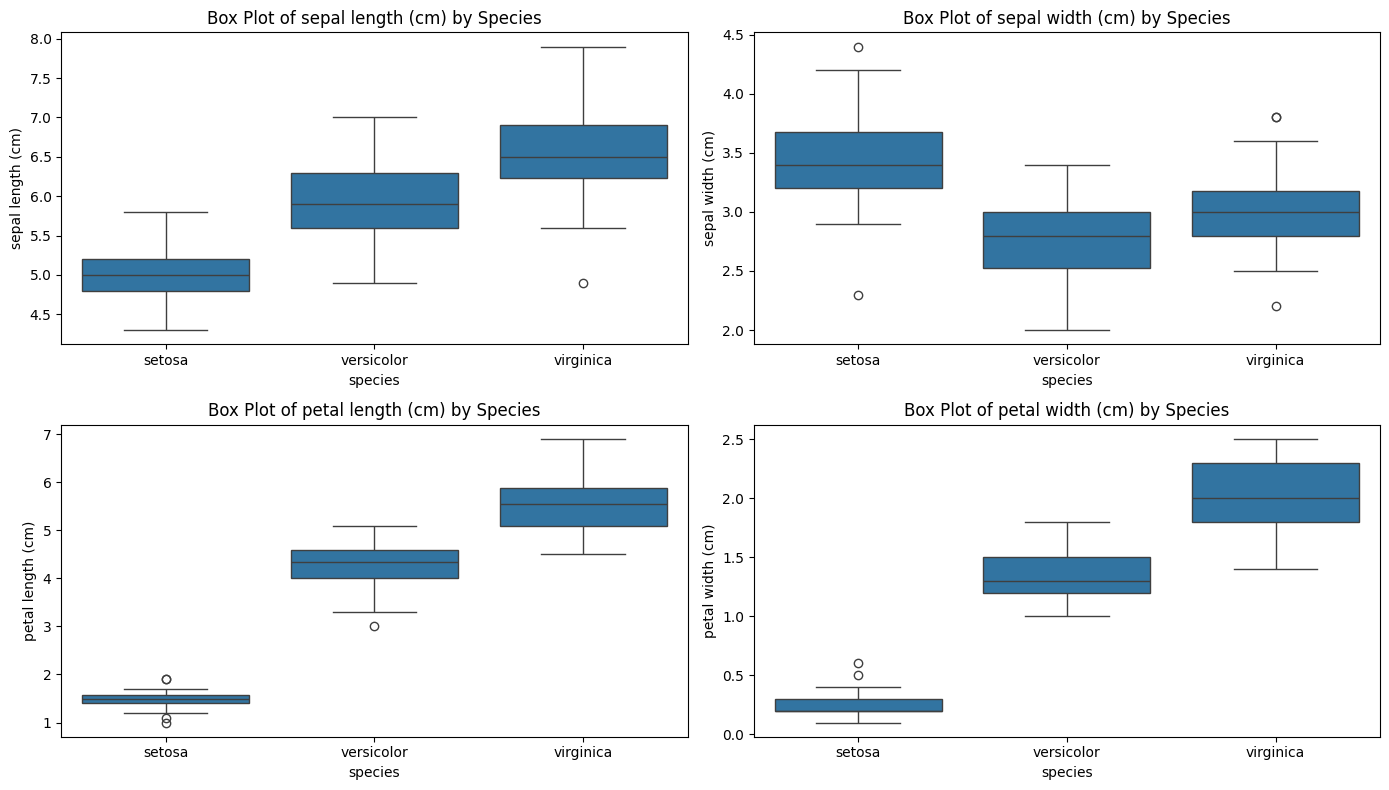

In [17]:
# Box plots for all numeric features grouped by species
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f'Box Plot of {column} by Species')
plt.tight_layout()
plt.show()


The box plots show the distribution of each numerical feature (`sepal_length`, `sepal_width`, `petal_length`, and `petal_width`) for each of the three Iris species (`setosa`, `versicolor`, and `virginica`).

Each box plot displays:
- **The box:** Represents the interquartile range (IQR), from the first quartile (25th percentile) to the third quartile (75th percentile). The median (50th percentile) is marked by a line inside the box.
- **The whiskers:** Extend from the edges of the box to the minimum and maximum values within 1.5 times the IQR from the box.
- **Points outside the whiskers:** Represent potential outliers.

**Observations from the box plots:**

- **sepal_length:** There is a clear progression in sepal length across the species, with setosa having the shortest, versicolor in the middle, and virginica having the longest. There are no obvious outliers in sepal length.
- **sepal_width:** Setosa generally has wider sepals than versicolor and virginica. There are a few potential outliers with unusually wide or narrow sepals, particularly in the setosa and versicolor species.
- **petal_length:** This feature shows the most distinct separation between the species, with almost no overlap between setosa and the other two. Versicolor and virginica have more overlap in petal length, but virginica generally has longer petals. There are no apparent outliers in petal length.
- **petal_width:** Similar to petal length, petal width is very effective in separating the species. Setosa has very narrow petals, while versicolor and virginica have wider petals, with virginica having the widest on average. There is one potential outlier in virginica with a smaller petal width than expected for that species.

Overall, the box plots provide a good summary of the spread, central tendency, and potential outliers for each feature, broken down by species. They reinforce the observation that petal dimensions are particularly useful for distinguishing between the Iris species.

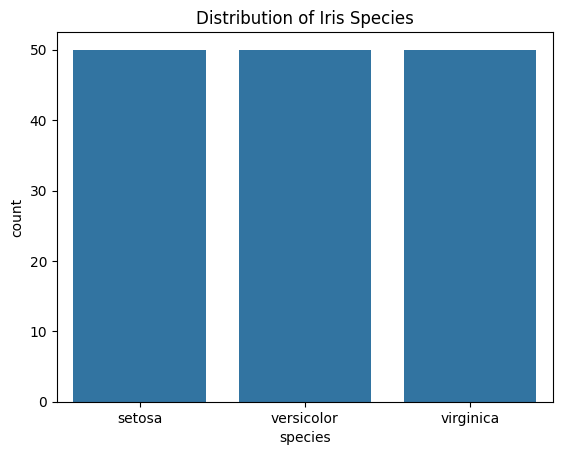

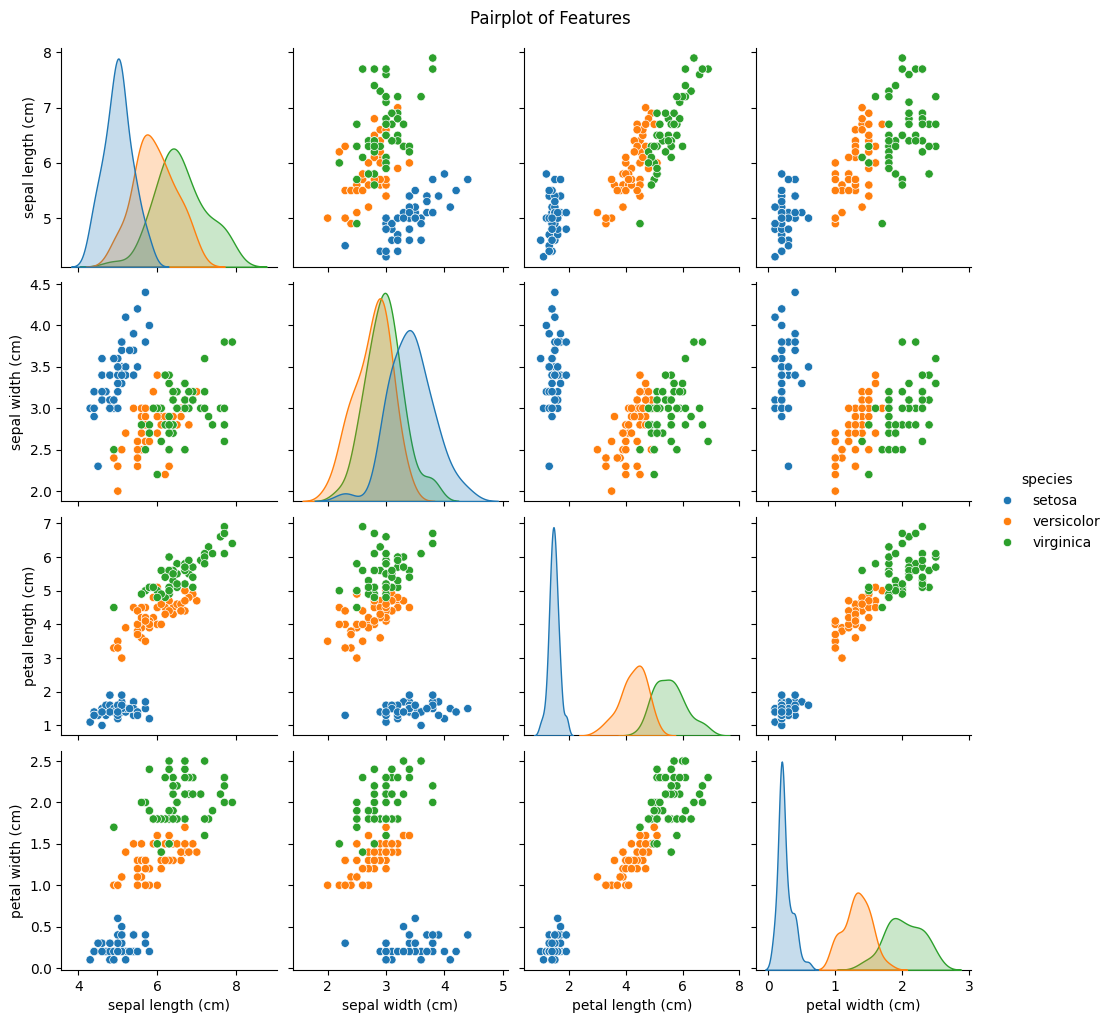

In [18]:
# Count of each species
sns.countplot(x='species', data=df)
plt.title('Distribution of Iris Species')
plt.show()

# Pairplot to see feature relationships
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

This code block performs two key data visualizations to understand the distribution of species and the relationships between different features in the Iris dataset:

1.  **Species Distribution (Count Plot):**
    *   `sns.countplot(x='species', data=df)`: This line uses the `countplot` function from the Seaborn library to create a bar plot.
        *   `x='species'`: Specifies that the bars should represent the unique values in the 'species' column.
        *   `data=df`: Indicates that the data source is the pandas DataFrame `df`.
    *   `plt.title('Distribution of Iris Species')`: Sets the title of the count plot to "Distribution of Iris Species".
    *   `plt.show()`: Displays the generated count plot.

    This plot visually shows the number of samples for each of the three Iris species (setosa, versicolor, virginica). It helps to quickly assess if the dataset is balanced (i.e., if there's a roughly equal number of samples for each species) or if there are any class imbalances. In this case, the output shows that the dataset is balanced, with 50 samples for each species.

2.  **Feature Relationships (Pair Plot):**
    *   `sns.pairplot(df, hue='species')`: This line uses the `pairplot` function from Seaborn to create a matrix of scatter plots.
        *   `df`: Specifies the DataFrame `df` as the data source.
        *   `hue='species'`: Colors the points in each scatter plot according to the 'species' of the flower. This is crucial for understanding how the different features relate to each other *within* and *between* species.
    *   `plt.suptitle("Pairplot of Features", y=1.02)`: Sets a main title for the entire pair plot grid, positioned slightly above the plots.
    *   `plt.show()`: Displays the generated pair plot.

    The pair plot creates a grid where each numerical feature is plotted against every other numerical feature.
    *   **Diagonal:** The plots on the diagonal show the distribution of each individual feature (histograms or kernel density estimates). Since `hue='species'` is used, these distributions are shown separately for each species.
    *   **Off-Diagonal:** The plots off the diagonal are scatter plots showing the relationship between two different features. Each point in the scatter plot is colored by its species.

    The pair plot is a powerful tool for exploratory data analysis as it allows you to:
    *   Visualize the relationships between all pairs of numerical features simultaneously.
    *   Observe how well the different species are separated based on combinations of features.
    *   Identify potential correlations or patterns between features that might be useful for classification.

    From the pair plot, you can visually confirm the observations made from the individual scatter plots and histograms. For instance, you'll likely see clear separation between setosa and the other two species in plots involving petal length and petal width, while there might be more overlap between versicolor and virginica in some feature combinations.

**🧹 Step 4: Preprocess the Data**

In [19]:
# Separate features and labels
X = df[iris.feature_names]
y = df['species']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**🤖 Step 5: Train the Classification Model**

In [20]:
# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


**📈 Step 6: Evaluate the Model**

Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



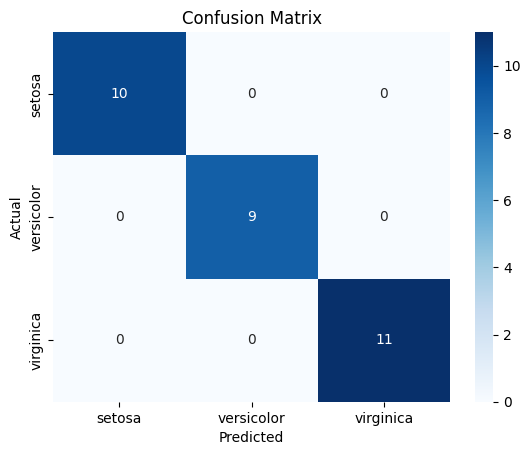

In [21]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Explanation of the Output from Model Evaluation:**

It summarizes the performance of the trained Random Forest classification model on the test dataset:

1.  **Model Accuracy: 100.00%**
    *   This is the most straightforward metric and indicates that the model correctly predicted the species for every single one of the 30 Iris flowers in the test set. An accuracy of 100% means that out of all the predictions made, 100% were correct.

2.  **Classification Report:**
    *   The classification report provides a more detailed look at the model's performance for each individual species (setosa, versicolor, and virginica).
    *   For **each species**, you see:
        *   **precision:** 1.00
        *   **recall:** 1.00
        *   **f1-score:** 1.00
        *   **support:** The number of actual instances of that species in the test set (10 for setosa, 9 for versicolor, 11 for virginica).
    *   A precision of 1.00 for a species means that whenever the model predicted a flower belonged to that species, it was *always* correct.
    *   A recall of 1.00 for a species means that the model correctly identified *all* of the actual instances of that species in the test set.
    *   An f1-score of 1.00, being the harmonic mean of precision and recall, reflects the perfect balance achieved for each class.
    *   The `accuracy` line at the bottom confirms the overall accuracy (1.00).
    *   `macro avg` and `weighted avg` provide averages of these metrics across all classes, useful when dealing with imbalanced datasets (though not strictly necessary for this balanced dataset).

3.  **Confusion Matrix:**
    *   The confusion matrix is a visual table that shows exactly where the model's predictions landed compared to the actual species. In this case, the heatmap visualizes the matrix.
    *   The rows represent the **Actual** species, and the columns represent the **Predicted** species.
    *   The numbers within the heatmap cells show the count of instances.
    *   With 100% accuracy, the confusion matrix output would show:
        *   The main diagonal (top-left to bottom-right) would have the counts of correctly classified instances for each species (10 for setosa, 9 for versicolor, 11 for virginica). These are the "True Positives" for each class when viewed in a one-vs-rest context.
        *   All other cells (off the main diagonal) would contain `0`. This signifies that there were **zero** misclassifications. The model did not predict a flower belonged to one species when it actually belonged to another.

**Reasons for the High Accuracy (100.00%) on the Iris Dataset:**

The consistent 1.00 values across all metrics and the 100% accuracy are primarily due to the characteristics of the Iris dataset and the suitability of the Random Forest model for this problem:

1.  **High Feature Discriminative Power:** As seen in the earlier exploratory data analysis (EDA) visualizations (scatter plots, box plots, pair plot), the features (especially petal length and petal width) are highly effective at separating the three Iris species. Setosa is almost linearly separable from the other two, and while there is some overlap between Versicolor and Virginica, the features provide enough information for the model to distinguish them.
2.  **Dataset Simplicity and Size:** The Iris dataset is a relatively small (150 samples) and well-behaved dataset, commonly used as a benchmark. It lacks complexities often found in real-world data like significant noise, missing values, or highly overlapping class distributions.
3.  **Effective Model (Random Forest):** The Random Forest classifier is a powerful and robust algorithm that can effectively learn complex decision boundaries. For a dataset with well-defined feature separation like Iris, a Random Forest can easily build trees that perfectly split the data.
4.  **Balanced Classes:** The equal number of samples for each species (50 each) prevents issues related to class imbalance, which can negatively impact model performance and evaluation metrics in other datasets.

In essence, the Iris dataset is quite "easy" for many machine learning models, and a capable model like Random Forest can often achieve perfect or near-perfect separation given the distinct nature of the features for each species. While 100% accuracy is excellent for this dataset, it's important to remember that this level of performance is not typical for more complex, real-world classification tasks.